# Analysis #10: Long Oskar Evolution
- Author: Leo BLONDEL

    
### Description
Generate Figure S5 where is plotted the overall occupancy of a position in the Oskar alignment trimmed for at least 10% overall occupancy at a position across Dipterian families. 

# Step 1 Filter Diptera Only

In [2]:
from Bio import SeqIO

In [7]:
handle = SeqIO.parse('../Data/01_Oskar_identification/oskar_tracker_results/oskar_all.fasta', 'fasta')
seqs = [s for s in handle if 'Diptera' in s.description]

In [11]:
SeqIO.write(seqs, '../Data/02_Oskar_analyses/2.10/OSKAR_Diptera.fasta', 'fasta')

193

In [12]:
!muscle -in ../Data/02_Oskar_analyses/2.10/OSKAR_Diptera.fasta -out ../Data/02_Oskar_analyses/2.10/OSKAR_Diptera.align.fasta


MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

OSKAR_Diptera 193 seqs, max length 1160, avg  length 575
00:00:00    24 MB(-2%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00    24 MB(-2%)  Iter   1  100.00%  K-mer dist pass 2
00:00:02   118 MB(-8%)  Iter   1  100.00%  Align node       
00:00:02   119 MB(-8%)  Iter   1  100.00%  Root alignment
00:00:04   120 MB(-8%)  Iter   2  100.00%  Refine tree   
00:00:04   120 MB(-8%)  Iter   2  100.00%  Root alignment
00:00:04   120 MB(-8%)  Iter   2  100.00%  Root alignment
00:00:13   120 MB(-8%)  Iter   3  100.00%  Refine biparts
00:00:21   120 MB(-8%)  Iter   4  100.00%  Refine biparts
00:00:29   120 MB(-8%)  Iter   5  100.00%  Refine biparts
00:00:32   120 MB(-8%)  Iter   6  100.00%  Refine biparts
00:00:32   120 MB(-8%)  Iter   6  100.00%  Refine biparts
00:00:40   120 MB(-8%)  Iter   7  100.00%  Refine biparts
00:00:47

In [156]:
! trimal \
-in ../Data/02_Oskar_analyses/2.10/OSKAR_Diptera.align.fasta \
-out ../Data/02_Oskar_analyses/2.10/OSKAR_Diptera.align.trimmed_0.1.fasta \
-gt 0.1 -fasta -keepheader


# Calculate occupancy per familly

In [179]:
import numpy as np
from tqdm import tqdm_notebook as tqdm

In [158]:
handle = SeqIO.parse('../Data/02_Oskar_analyses/2.10/OSKAR_Diptera.align.trimmed_0.1.fasta', 'fasta')
seqs = [s for s in handle]

In [186]:
sequence_groups = {}
for seq in seqs:
    family = seq.description.split('|')[-3]
    if family not in sequence_groups:
        sequence_groups[family] = []
    sequence_groups[family].append(seq)
    
occupancy = {}
for family in tqdm(sequence_groups):
    occupancy[family] = []
    for i in tqdm(range(len(sequence_groups[family][0]))):
        col = np.array(sequence_groups[family])[:, i]
        occ = (len(col) - ''.join(col).count('-')) / len(col)
        occupancy[family].append(occ)

# Plot Occupancy

In [190]:
import matplotlib.pyplot as plt

%matplotlib inline

In [194]:
family_order = ["Pediciidae",
"Cylindrotomidae",
"Psychodidae",
"Ceratopogonidae",
"Chironomidae",
"Culicidae",
"Chaoboridae",
"Scatopsidae",
"Cecidomyiidae",
"Keroplatidae",
"Bombyliidae",
"Asilidae",
"Platypezidae",
"Dolichopodidae",
"Lonchopteridae",
"Syrphidae",
"Pipunculidae",
"Tephritidae",
"Chloropidae",
"Diopsidae",
"Agromyzidae",
"Drosophilidae",
"Glossinidae",
"Muscidae",
"Scathophagidae",
"Sarcophagidae",
"Mystacinobiidae",
"Calliphoridae",
"Tachinidae"]

In [200]:
matrix = []
for fam in family_order:
    matrix.append(occupancy[fam])
matrix = np.array(matrix)
# matrix = matrix>0

([<matplotlib.axis.YTick at 0x7f32481019e8>,
 <a list of 29 Text yticklabel objects>)

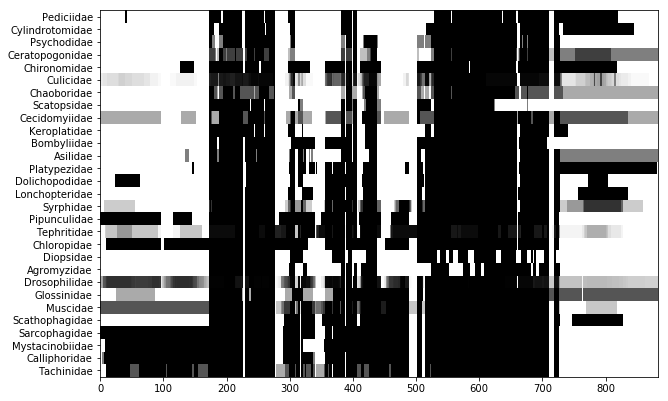

In [208]:
fig = plt.figure(figsize=(10,10))

plt.imshow(matrix, cmap='binary', aspect=20)
locs, labs = plt.yticks()
plt.yticks(range(len(family_order)), family_order)

# Phylogeny Tree plotting

Phylogeny extracted from 
https://www.pnas.org/content/pnas/108/14/5690.full.pdf

and The Tree of Life Project

In [59]:
import pandas as pd
import ete3 

In [15]:
search_results = pd.read_csv('../Data/01_Oskar_identification/oskar_tracker_results/search_results.csv')

In [21]:
families = search_results[(search_results['order_name'] == 'Diptera') & (search_results['hits'] > 0)]['family_name'].unique()

In [230]:
diptera_newick = """
(
((Pediciidae, Cylindrotomidae),
    ((Psychodidae,(Ceratopogonidae,(Chironomidae,(Culicidae,Chaoboridae)))),
        ((Scatopsidae, (Cecidomyiidae, Keroplatidae)),
            ((Bombyliidae, Asilidae),
                ((Platypezidae,Phoridae),
                    (Dolichopodidae,
                        (Lonchopteridae,
                            (Syrphidae,
                                (Pipunculidae,
                                ((Tephritidae,
                                    (Chloropidae)),        
                                    (Drosophilidae,
                                        (Glossinidae,
                                            (Muscidae,
                                                (Scathophagidae,
                                                    (Sarcophagidae,
                                                        (Mystacinobiidae,
                                                            (Calliphoridae,
                                                            Tachinidae)))))))))))))))))
);
"""

In [253]:
def pie_face(node, source, col):
    tmp = lepi_metadatas[lepi_metadatas['source'] == source]
    if node.name in tmp['family_name'].values:
        prop = tmp[tmp['family_name'] == node.name]['found_prop'].values[0]
        count = tmp[tmp['family_name'] == node.name]['filtered_hits'].values[0]
        color = colormap.order("Lepidoptera")
        percents = [min(100*prop, 100), max(0, (1-prop)*100)]
        if prop != 0:
            colors = [color, colormap.gray]
            text_color = "black"
        else:
            colors = [color, colormap.light_gray]
            text_color = colormap.gray
        F = ete3.PieChartFace(percents, 20, 20, colors=colors, line_color=None)
        F.margin_left = 5
        F.hz_align=1
        ete3.faces.add_face_to_node(F, node, col, aligned=True)
        T = ete3.TextFace("{} | {}%".format(int(count), int(min(100*prop, 100))), fgcolor=text_color)
        T.margin_left = 5
        T.hz_align=1
        ete3.faces.add_face_to_node(T, node, col +1 , aligned=True)
    return col + 2
     
def count_face(node, col):
    if node.name in lepi_metadatas['family_name'].values:
        tmp = lepi_metadatas.groupby('family_name', as_index=False).sum()

        count = tmp[(tmp['family_name'] == node.name)]['index'].values[0]
        
        T = ete3.TextFace(count, fgcolor='black')
        T.margin_left = 5
        T.hz_align = 1
        ete3.faces.add_face_to_node(T, node, col, aligned=True)
        
    return col + 1

def total_oskar_found_face(node, col):
    if node.name in lepi_metadatas['family_name'].values:
        tmp = lepi_metadatas.groupby('family_name',as_index=False).sum()
        tmp['found_prop'] = tmp['filtered_hits'] / tmp['index']
        prop = tmp[tmp['family_name'] == node.name]['found_prop'].values[0]
        count = tmp[tmp['family_name'] == node.name]['filtered_hits'].values[0]
        if prop != 0:
            color = colormap.order("Lepidoptera")
            colors = [color, colormap.gray]
            percents = [min(100*prop, 100), max(0, (1-prop)*100)]
            text_color = "black"
        else:
            colors = [colormap.light_gray]
            percents = [100]
            text_color = colormap.gray
        F = ete3.StackedBarFace(percents, 70, 20, colors=colors, line_color=None)
        F.margin_left = 15
        F.hz_align=0
        ete3.faces.add_face_to_node(F, node, col, aligned=True)
        T = ete3.TextFace("{} | {}%".format(int(count), int(min(100*prop, 100))), fgcolor=text_color)
        T.margin_left = 5
        T.margin_right = 15        
        T.hz_align=2
        ete3.faces.add_face_to_node(T, node, col + 1 , aligned=True)
    return col + 2
    
def color_code_face(node, col):
    if (lepi_metadatas[lepi_metadatas['family_name'] == node.name]['filtered_hits'].values > 0).any():
        color = colormap.order('Lepidoptera')
    else:
        color = colormap.order('Other')
    F = ete3.RectFace(20, 22, color, color)
    F.margin_left = 5
    F.margin_top=2    
    ete3.faces.add_face_to_node(F, node, col, aligned=True)

    return col + 1

def header(node, text, col):
    # Handlding the headers, we run it once on Crustacea
    if node.name == 'Agathiphagidae':
        T = ete3.TextFace(text, fgcolor="#000000")
        T.hz_align=1
        T.margin_left = 5
        ts.aligned_header.add_face(T, col)

def plot_heatmap(node, col):
    occ = np.array(occupancy[node.name])
#     occ *= occ > 0.5
    node.profile = occ + 0.0001
    node.deviation = [0]*len(occ)
    P = ete3.ProfileFace(1, -1, 0, width=len(occ), values_vector=occ, style='heatmap', colorscheme=0)
#     P.hz_align=1
    P.margin_left = 5
    ete3.faces.add_face_to_node(P, node, col, aligned=True)
    return col + 1
        
def layout(node):
    if node.is_leaf():
        # Add node name to laef nodes
        N = ete3.AttrFace("name", fsize=14, fgcolor="black")
        N.vt_align = 1
        N.margin_left = 5
        ete3.faces.add_face_to_node(N, node, 0, aligned=True)
        col = 1
        
        col = plot_heatmap(node, col)
#         col = color_code_face(node, col)
        
#         header(node, "# of\ndataset\nsearched", col)
#         col = count_face(node, col)
        
#         header(node, "% of \noskar\nfound", col)
#         col = total_oskar_found_face(node, col)        
        
#         header(node, "% of\nhits in\nRefSeq", col)
#         col = pie_face(node, 'GCF', col)
#         header(node, "% of\nhits in\nGenbank", col)
#         col = pie_face(node, 'GCA', col)
#         header(node, "% of\nhits in\nTSA", col)
#         col = pie_face(node, 'TSA', col)
        
    nstyle = ete3.NodeStyle()
    nstyle["size"] = 0
    nstyle["fgcolor"] = "black"
    node.set_style(nstyle)

In [254]:
#Define the tree style
ts = ete3.TreeStyle()
ts.show_leaf_name = False
ts.show_branch_length = False
ts.show_branch_support = False
ts.draw_aligned_faces_as_table = True
ts.draw_guiding_lines = True
ts.show_scale = False
ts.scale=10
ts.guiding_lines_type = 0
ts.guiding_lines_color = 'black'
ts.layout_fn = layout

In [255]:
T = ete3.Tree(diptera_newick)

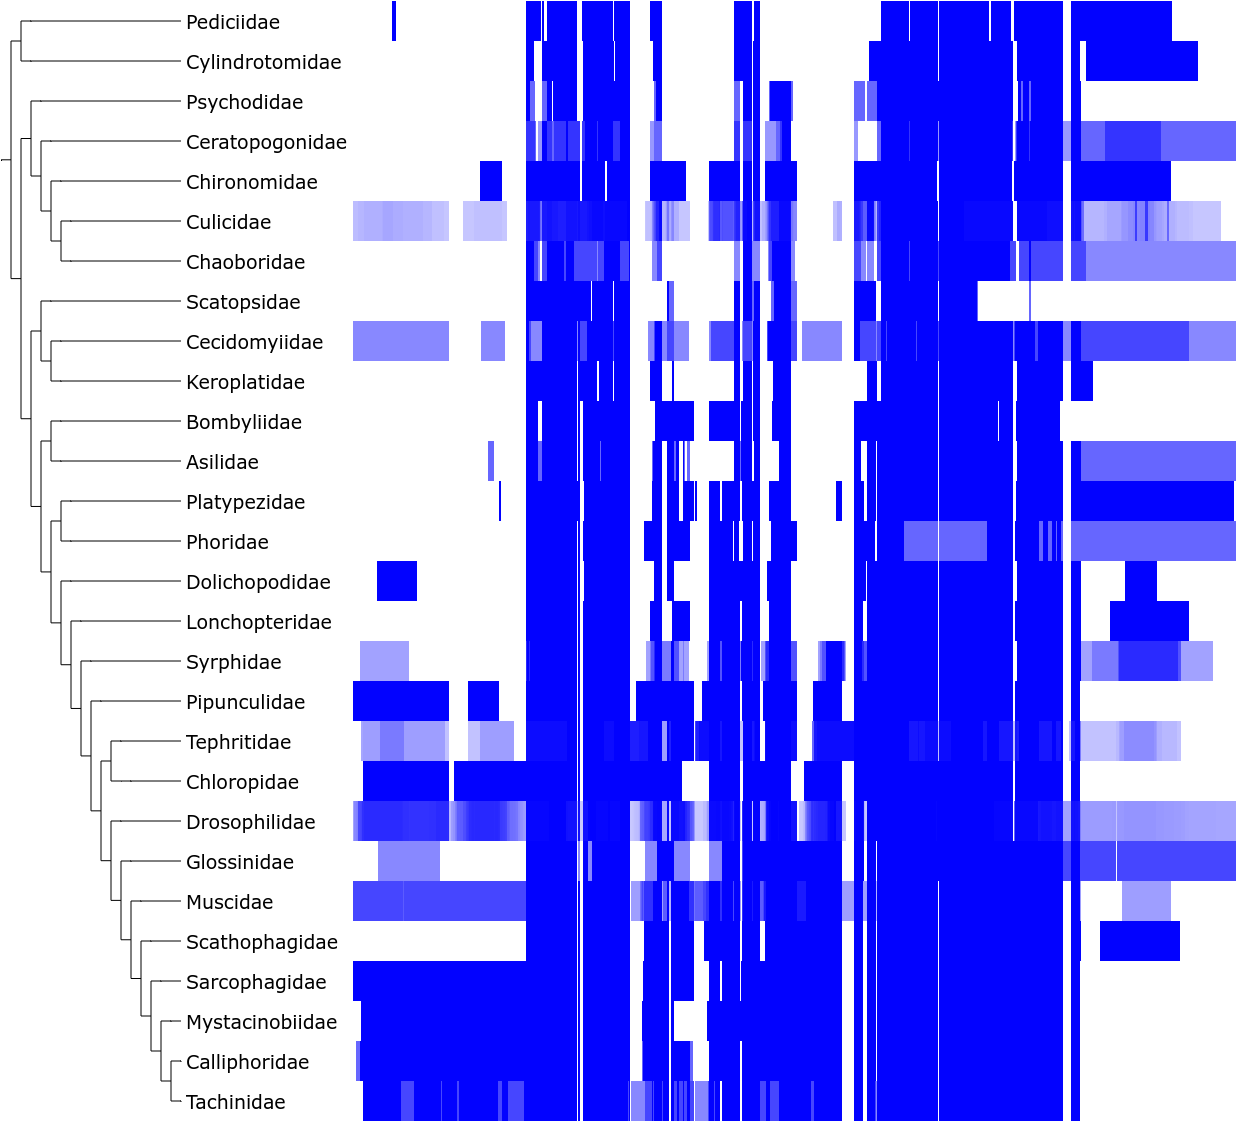

In [256]:
T.render('%%inline', tree_style=ts)

In [257]:
T.render('../Figures/RAW/Diptera_tree.svg', tree_style=ts)

{'nodes': [],
 'faces': [[186.0, 9.0, 281.0, 33.0, 3, 'Pediciidae'],
  [353.0, 1.0, 1236.0, 41.0, 3, None],
  [186.0, 49.0, 342.0, 73.0, 4, 'Cylindrotomidae'],
  [353.0, 41.0, 1236.0, 81.0, 4, None],
  [186.0, 89.0, 304.0, 113.0, 7, 'Psychodidae'],
  [353.0, 81.0, 1236.0, 121.0, 7, None],
  [186.0, 129.0, 348.0, 153.0, 9, 'Ceratopogonidae'],
  [353.0, 121.0, 1236.0, 161.0, 9, None],
  [186.0, 169.0, 318.0, 193.0, 11, 'Chironomidae'],
  [353.0, 161.0, 1236.0, 201.0, 11, None],
  [186.0, 209.0, 272.0, 233.0, 13, 'Culicidae'],
  [353.0, 201.0, 1236.0, 241.0, 13, None],
  [186.0, 249.0, 306.0, 273.0, 14, 'Chaoboridae'],
  [353.0, 241.0, 1236.0, 281.0, 14, None],
  [186.0, 289.0, 301.0, 313.0, 17, 'Scatopsidae'],
  [353.0, 281.0, 1236.0, 321.0, 17, None],
  [186.0, 329.0, 324.0, 353.0, 19, 'Cecidomyiidae'],
  [353.0, 321.0, 1236.0, 361.0, 19, None],
  [186.0, 369.0, 306.0, 393.0, 20, 'Keroplatidae'],
  [353.0, 361.0, 1236.0, 401.0, 20, None],
  [186.0, 409.0, 303.0, 433.0, 23, 'Bombyliidae'